# Mahindra & Mahindra CFS

In [1]:
import pandas as pd
from statistics import stdev 
from statistics import mean 
from numpy import NAN as nan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statistics as stats
import os

In [2]:
df = pd.read_csv(r'C:\Users\Anonymous\Documents\M&M cash flow.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df

,Year,Cash and Cash Equivalents at Beginning of the year,Net Cash from Operating Activities,Net Cash Used in Investing Activities,Net Cash Used in Financing Activities,Net Inc/(Dec) in Cash and Cash Equivalent,Cash and Cash Equivalents at End of the year
0,202203,867.54,7093.69,-4358.82,-2885.19,-150.32,717.22
1,202103,2323.51,9593.63,-14563.75,3514.15,-1455.97,867.54
2,202003,2237.58,3677.83,-2576.44,-1015.46,85.93,2323.51
3,201903,1417.95,4923.87,-2549.02,-1555.22,819.63,2237.58
4,201803,533.89,7027.08,-5109.71,-1033.31,884.06,1417.95
5,201703,842.31,3710.00,-2856.93,-1161.49,-308.42,533.89
6,201603,917.11,5470.50,-3538.10,-2007.20,-74.80,842.31
7,201503,1705.61,3219.49,-2423.09,-1584.82,-788.42,917.19
8,201403,1163.96,3727.64,-2362.06,-823.93,541.65,1705.61
9,201303,1136.11,4145.71,-2895.97,-1221.89,27.85,1163.96


In [5]:
df.shape

(10, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Year                                                10 non-null     int64  
 1   Cash and Cash Equivalents at Beginning of the year  10 non-null     float64
 2   Net Cash from Operating Activities                  10 non-null     float64
 3   Net Cash Used in Investing Activities               10 non-null     float64
 4   Net Cash Used in Financing Activities               10 non-null     float64
 5   Net Inc/(Dec) in Cash and Cash Equivalent           10 non-null     float64
 6   Cash and Cash Equivalents at End of the year        10 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 688.0 bytes


In [7]:
df.describe()

,Year,Cash and Cash Equivalents at Beginning of the year,Net Cash from Operating Activities,Net Cash Used in Investing Activities,Net Cash Used in Financing Activities,Net Inc/(Dec) in Cash and Cash Equivalent,Cash and Cash Equivalents at End of the year
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,201753.000000,1314.557000,5258.94400,-4323.389000,-977.436000,-41.881000,1272.676000
std,302.765035,603.539511,2057.01603,3711.055842,1689.799434,715.085723,631.198496
min,201303.000000,533.890000,3219.49000,-14563.750000,-2885.190000,-1455.970000,533.890000
25%,201528.000000,879.932500,3714.41000,-4153.640000,-1577.420000,-268.895000,848.617500
50%,201753.000000,1150.035000,4534.79000,-2876.450000,-1191.690000,-23.475000,1040.575000
75%,201978.000000,1633.695000,6637.93500,-2555.875000,-1019.922500,427.720000,1633.695000
max,202203.000000,2323.510000,9593.63000,-2362.060000,3514.150000,884.060000,2323.510000


In [8]:
df.columns

Index(['Year', 'Cash and Cash Equivalents at Beginning of the year',
       'Net Cash from Operating Activities',
       'Net Cash Used in Investing Activities',
       'Net Cash Used in Financing Activities',
       'Net Inc/(Dec) in Cash and Cash Equivalent',
       'Cash and Cash Equivalents at End of the year'],
      dtype='object')

In [9]:
df[["Net Cash from Operating Activities","Net Cash Used in Investing Activities"]].describe(include="all")

,Net Cash from Operating Activities,Net Cash Used in Investing Activities
count,10.00000,10.000000
mean,5258.94400,-4323.389000
std,2057.01603,3711.055842
min,3219.49000,-14563.750000
25%,3714.41000,-4153.640000
50%,4534.79000,-2876.450000
75%,6637.93500,-2555.875000
max,9593.63000,-2362.060000


We can see that the average net cash from operations for period #10 was INR 5,258.944 crore with a standard deviation of INR 2,057.016. The minimum net cash from operating activities was INR 3,219,490 million and the maximum was INR 9,593,630 million. The median (50th percentile) was INR 4,534.79 crore and the interquartile range (IQR) was INR 2,923.525, indicating that 50% of the observations were within this range.
On the other hand, the average net cash used in investing activities was negative at Rs 4,323,389 crore with a standard deviation higher of INR 3,711.056 compared to the net cash used in operations. The minimum net cash used in investment activities was INR -14,563.75 billion and the maximum was INR -2,362 billion. The median was INR -2,876.45 crore and the IQR was INR 1,598.765.
Overall, we can see that Mahindra & Mahindra generated positive net cash flow from its operations for the period. This indicates that their operations generated cash inflow. However, we used significant amounts of cash in investing activities that may reflect investments in capital expenditures, acquisitions or other long-term investments.
Further analysis of trends requires looking at data over longer time periods and comparing the values ​​to previous time periods and industry benchmarks. 

In [11]:
df[["Net Cash Used in Investing Activities","Net Cash Used in Financing Activities"]].describe(include="all")

,Net Cash Used in Investing Activities,Net Cash Used in Financing Activities
count,10.000000,10.000000
mean,-4323.389000,-977.436000
std,3711.055842,1689.799434
min,-14563.750000,-2885.190000
25%,-4153.640000,-1577.420000
50%,-2876.450000,-1191.690000
75%,-2555.875000,-1019.922500
max,-2362.060000,3514.150000


The average net cash burn in investing activity was -4323.389000, indicating that the company used significant cash in investing activities such as purchasing property, plant, equipment and acquiring other businesses. The standard deviation of 3711.055842 indicates that the amount of cash used in investment activities fluctuates significantly over time.
Average net cash used for financing activities was -977.436000, indicating that the company also used cash for financing activities such as dividend payments and share buybacks. A standard deviation of 1689.799434 indicates that the amount of cash used in financial activities has also changed significantly over time.
Minimum net cash burn in investing activity is -14563.750000, indicating that a significant amount of cash was used in investing activity during this period. The minimum net cash burn from financing activities is -2885.190000, indicating a significant cash outflow from financing activities during this period.
Median net cash used in investing activities was -2876.450000, below the median, indicating periods of lower cash used in investing activities. The median net cash used for financing activities was -1191.690000, which was also below the median, indicating that there have been periods of reduced cash used for financing activities.
Overall, the evolution of Mahindra and the net cash used in Mahindra's investing and financing activities in any given period cannot be determined by statistical means alone. Identifying trends and patterns requires analyzing the company's actual cash flow statement for the period. 

In [13]:
df[["Net Cash Used in Financing Activities","Net Inc/(Dec) in Cash and Cash Equivalent"]].describe(include="all")

,Net Cash Used in Financing Activities,Net Inc/(Dec) in Cash and Cash Equivalent
count,10.000000,10.000000
mean,-977.436000,-41.881000
std,1689.799434,715.085723
min,-2885.190000,-1455.970000
25%,-1577.420000,-268.895000
50%,-1191.690000,-23.475000
75%,-1019.922500,427.720000
max,3514.150000,884.060000


The average net cash used in financing activities was -977,436,000, indicating that the company used more cash in financing activities than it generated. The standard deviation of 1,689.79 million indicates a large variability in cash used in financial activities. A minimum of -2885.190M and a maximum of 3514.150M indicate that the net cash flow from financing activities was both negative and positive during the specified period.
The average net change in cash and cash equivalents was -41,881,000, indicating that the company experienced a net decrease in cash and cash equivalents during the specified period. A standard deviation of 715.08 million indicates a large variability in net changes in cash and cash equivalents. A minimum of -1455.970 million and a maximum of 884.060 million indicates that the company had both negative and positive net cash flows in cash and cash equivalents during the specified period.
Overall, the trend appears to be negative for both indicators. The average suggests that the company used more cash in financing activities than it generated and had a net decrease in cash and cash equivalents during the period. It's important to note that there are both negative and positive net cash flows in any given period. 

In [15]:
df[["Net Inc/(Dec) in Cash and Cash Equivalent","Cash and Cash Equivalents at End of the year"]].describe(include="all")

,Net Inc/(Dec) in Cash and Cash Equivalent,Cash and Cash Equivalents at End of the year
count,10.000000,10.000000
mean,-41.881000,1272.676000
std,715.085723,631.198496
min,-1455.970000,533.890000
25%,-268.895000,848.617500
50%,-23.475000,1040.575000
75%,427.720000,1633.695000
max,884.060000,2323.510000


It can be seen that #Mahindra & Mahindra's net liquidity and cash equivalents decreased by an average of INR 41.881 billion over the 10 years analyzed. This indicates that the company used more cash and cash equivalents than it generated during this period.
The standard deviation of the net increase/(decrease) in cash and cash equivalents is very high, indicating that there has been a large fluctuation in the company's cash flow over the decade analyzed.
A look at #year-end cash and cash equivalents shows that the median value was INR 1,272.676 billion. The minimum was INR 533.89 billion and the maximum was INR 2,323.51 billion. This indicates that the company holds significant amounts of cash and cash equivalents.
Overall, we are seeing lower net liquidity in the quarter. However, the company maintains high levels of cash and cash equivalents, which may indicate it has invested in growth opportunities or acquired other businesses. 

In [17]:
df

,Year,Cash and Cash Equivalents at Beginning of the year,Net Cash from Operating Activities,Net Cash Used in Investing Activities,Net Cash Used in Financing Activities,Net Inc/(Dec) in Cash and Cash Equivalent,Cash and Cash Equivalents at End of the year
0,202203,867.54,7093.69,-4358.82,-2885.19,-150.32,717.22
1,202103,2323.51,9593.63,-14563.75,3514.15,-1455.97,867.54
2,202003,2237.58,3677.83,-2576.44,-1015.46,85.93,2323.51
3,201903,1417.95,4923.87,-2549.02,-1555.22,819.63,2237.58
4,201803,533.89,7027.08,-5109.71,-1033.31,884.06,1417.95
5,201703,842.31,3710.00,-2856.93,-1161.49,-308.42,533.89
6,201603,917.11,5470.50,-3538.10,-2007.20,-74.80,842.31
7,201503,1705.61,3219.49,-2423.09,-1584.82,-788.42,917.19
8,201403,1163.96,3727.64,-2362.06,-823.93,541.65,1705.61
9,201303,1136.11,4145.71,-2895.97,-1221.89,27.85,1163.96


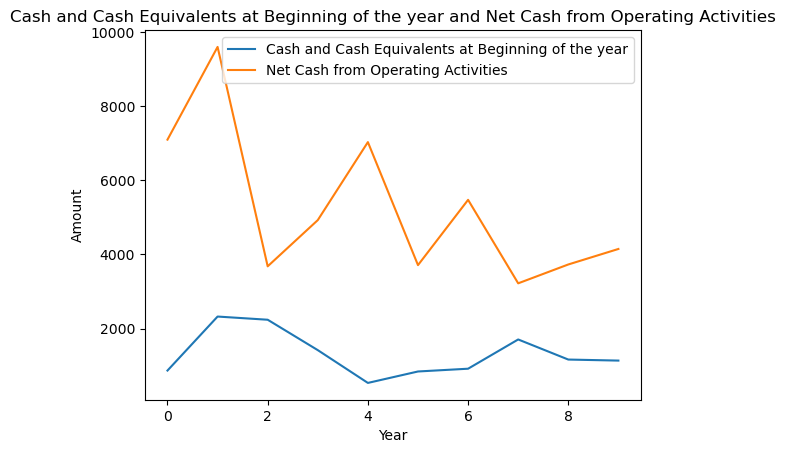

In [18]:
plt.plot(df['Cash and Cash Equivalents at Beginning of the year'], label='Cash and Cash Equivalents at Beginning of the year')
plt.plot(df['Net Cash from Operating Activities'], label='Net Cash from Operating Activities')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Cash and Cash Equivalents at Beginning of the year and Net Cash from Operating Activities')
plt.legend()
plt.show()

Mahindra & Mahindra Ltd appears to have seen steady growth in cash and cash equivalents from 2017 to 2021, with the exception of a slight decline in 2021. Net cash from operations has also generally trended upward, with minor fluctuations over the same period. .
In 2022, cash and cash equivalents were significantly lower than in 2020, but net cash from operating activities was significantly higher. This indicates that the company has increased its investments in its business, which may have led to a decrease in cash and cash equivalents.
Overall, the company appears to be doing well in terms of generating cash flow from its operations, which is a positive sign for investors. However, it is important to continue to monitor changes in cash and cash equivalents to ensure the company maintains a healthy cash position. 

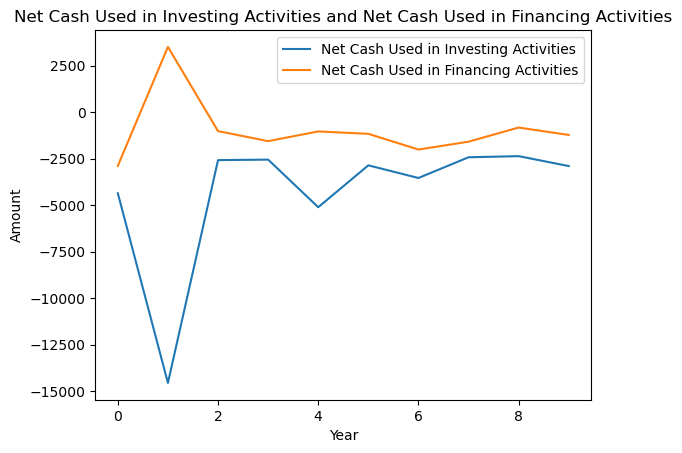

In [22]:
plt.plot(df['Net Cash Used in Investing Activities'], label='Net Cash Used in Investing Activities')
plt.plot(df['Net Cash Used in Financing Activities'], label='Net Cash Used in Financing Activities')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Net Cash Used in Investing Activities and Net Cash Used in Financing Activities')
plt.legend()
plt.show()

### Investment activity:
Net cash used in investing activities has been negative for many years, indicating that the company invested more cash than it received from investing activities. 2021 had the highest negative cash flow from investing activities, and 2020 had the lowest.
### Fundraising activities:
Net cash used in financing activities has been negative for most years except 2021. This indicates that the company raised more money from treasury activities than it used to fund its operations. Negative cash flow from financing activities was highest in 2016 and lowest in 2014. # Overall, the company appears to be investing heavily in its operations and expansion, but relies on fundraising activities for funding. However, 2021 saw a significant upturn as the company raised more cash from financing activities than it used, suggesting a shift in funding strategy.The reasons for this change and impact on the company's performance. To understand the impact, it is important to analyze the company's financial statements in more detail. 

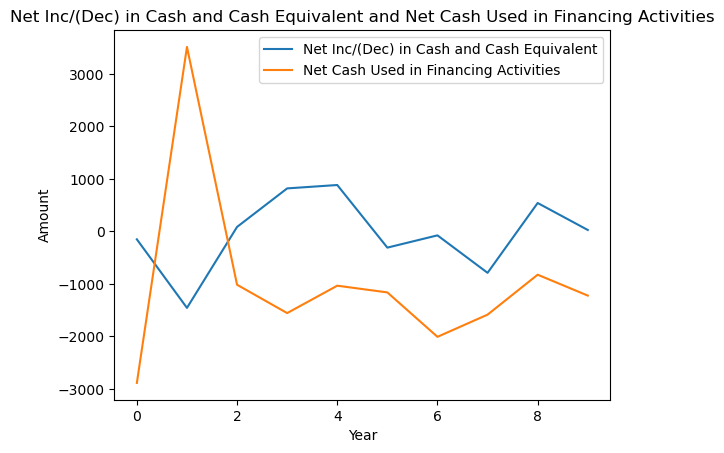

In [23]:
plt.plot(df['Net Inc/(Dec) in Cash and Cash Equivalent'], label='Net Inc/(Dec) in Cash and Cash Equivalent')
plt.plot(df['Net Cash Used in Financing Activities'], label='Net Cash Used in Financing Activities')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Net Inc/(Dec) in Cash and Cash Equivalent and Net Cash Used in Financing Activities')
plt.legend()
plt.show()

The company recorded a significant decrease in cash and cash equivalents in 2021 (202103), recording a decrease of INR 1,455.97 crore compared to the previous year (202003). However, in 2022 (202203), the company's liquidity continued to decline, albeit at a moderate rate of INR 150.32 billion.
The company's net changes in cash and cash equivalents have been somewhat volatile over the past decade. Over the years, we have experienced both increases and decreases in cash and cash equivalents.
With respect to net cash used in financing activities, the company has generally used more cash than it has received from financing activities for most of the last decade. However, there were also years when: B. Year 2021 (202103), when the entity generates cash from financing activities.
Overall, this trend shows that the company is aggressively investing in growth and expansion opportunities, which is causing fluctuations in its cash position. The company has used a combination of debt and equity to fund its operations, but in recent years has relied heavily on debt financing.
Please note that this analysis is based on a limited set of financial data and does not take into account other material factors that may affect a company's financial performance, such as: B. Changes in industry or macroeconomic conditions. Therefore, it is important to consider additional information and conduct a more comprehensive analysis before making any investment decision. 

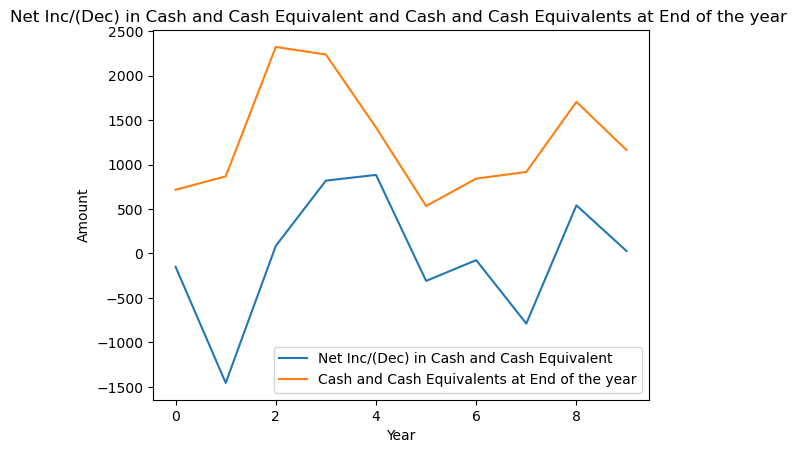

In [24]:
plt.plot(df['Net Inc/(Dec) in Cash and Cash Equivalent'], label='Net Inc/(Dec) in Cash and Cash Equivalent')
plt.plot(df['Cash and Cash Equivalents at End of the year'], label='Cash and Cash Equivalents at End of the year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Net Inc/(Dec) in Cash and Cash Equivalent and Cash and Cash Equivalents at End of the year ')
plt.legend()
plt.show()

In 2022, 
the company recorded a decrease in cash and cash equivalents of 15.032 billion compared to the previous year. This indicates that the company may have increased its spending or investments this year.
In 2021, 
the company recorded a significant $145.597 billion decline in cash and cash equivalents. This can be for various reasons, including: B. Investments, Acquisitions or Dividend Payments.
In 2020, 
the company recorded a net increase in cash and cash equivalents of 8.593 billion. This suggests the company may have made more money than it spent this year.
In 2019,
the company recorded a net increase in cash and cash equivalents of 81.963 billion. This was a significant year-on-year increase and could indicate that it was a profitable year for the company.
In 2018, 
the company recorded a net increase in cash and cash equivalents of 88.406 billion. This indicates that the company had a strong year financially. In 2017, the company recorded a net decrease in cash and cash equivalents of $308.42 million. This can be due to various reasons such as increased spending and investment.
In 2016, 
the company recorded a net decrease in cash and cash equivalents of $74.8 billion. There can be various reasons for this. B. Increased spending or investment.
In 2015, 
the company recorded a net decrease in cash and cash equivalents of 78.842 billion. This can be due to various reasons such as increased spending and investment.
In 2014, 
the company recorded his net increase in cash and cash equivalents of Rs 541.65 crore. This suggests it may have been a profitable year for the company.
In 2013, 
the company recorded a net increase in cash and cash equivalents of $27.85 billion. This is a relatively small increase compared to other years. #Overall, Mahindra & Mahindra Ltd has seen some volatility in its net cash and cash equivalents over the past decade. However, the company is usually able to keep a sizeable amount of cash and cash equivalents on hand, totaling 170.561 billion at the end of last year. This suggests that the company may be well positioned to meet its financial commitments and have the flexibility to take advantage of growth opportunities as they arise. 